# Ch. 1 - Setup

First we import the required dependencies.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Then we load the data provided on Aulis from github to our project directory.

In [3]:
DATASETS_URL = "https://github.com/TurboThommy/ml4ds-end-to-end-project/blob/main/data/"
DATASET_DIR = "datasets"

# File names
TRAINING_DATA_FILENAME = "Vehicles_export_prices_scaled_train_eng.xlsx"
TEST_DATA_FILENAME = "Vehicles_export_prices_scaled_stud_test_eng.xlsx"

def fetch_file_from_url(src_url, dest_path, file_name):
    if not os.path.isdir(dest_path):
        os.makedirs(dest_path)
    file_url = src_url + file_name + "?raw=true"
    file_path = os.path.join(dest_path, file_name)
    urllib.request.urlretrieve(file_url, file_path)

fetch_file_from_url(DATASETS_URL, DATASET_DIR, TRAINING_DATA_FILENAME)

Load the training data set and print the first few rows.

In [4]:
TRAINING_DATA_PATH = os.path.join("datasets", TRAINING_DATA_FILENAME)

def load_data(data_path):
    return pd.read_excel(data_path)

training_data_df = load_data(TRAINING_DATA_PATH)
training_data_df.head()

,RPAKREP_VEHICLE_HKEY,COMPANY,OFFICE,OFFICE_MAIN_BRAND,CHASSIS_NUMBER,MANUFACTURER_SHORT,MANUFACTURER,VEHICLE_GROUP,VEHICLE_TYPE,MODEL_CODE,...,CUSTOMER_SALE_GROUP_NAME,CUSTOMER_SALE_GROUP2,CUSTOMER_SALE_GROUP2_NAME,SCALED_CURRENT_VALUE,SCALED_INVENTURAL_VALUE,SCALED_REPORT_VALUE,SCALED_VALUATION_PRICE,SCALED_GUIDE_PRICE,SCALED_TOTAL_SALES_PRICE_BASIS,SCALED_TOTAL_SALE_PRICE
0,77c1af48604226d47b2ccf7be44df009,44.0,TA,TOY,WF01XXERK1JR43779,FOR,Ford,ECS,ECOSPORT 1.0 Titanium Eco,NaN,...,EV privat,EVPR,Endverbraucher private,0.052907,0.000000,0.950043,0.0,0.002975,0.011018,0.011321
1,39587e4f9324333232d2ffaa2f314e6d,12.0,44,VOL,YV1XZK7V5S2487523,VOL,Volvo,XC4,"XC40 B3 B DKG Core 120 kW, 5-t",536K7170F1,...,NaN,NaN,NaN,0.061605,0.000000,0.950043,0.0,0.006136,0.026411,0.019844
2,a91470879cf756368c1d0099a2fa939a,27.0,33,SKO,WF0DXXSK0RX009819,FOR,Ford,TOC,Tourneo Connect 2.0 EcoBl,26,...,EV privat,EVPR,Endverbraucher private,0.063286,0.000000,0.950043,0.0,0.001378,0.022102,0.022053
3,61363a68ff967e7f0c4b80b46a55b141,33.0,K1,V,WVWZZZAWZPU075160,V,Volkswagen,POL,"POLO LIFE 1,0 L 59 KW (80 PS)",AE13GV,...,Interne Kunden,INT,Interne Kunden,0.042565,0.029537,0.897257,0.0,0.001378,0.000000,0.000572
4,fd5b09f7d857904d03a36d1a479f2ca4,10.0,96,FOR,WF0PXXGCHPRC20073,FOR,Ford,FOC,FOCUS TITA 5W 1.0T 125 MHEV M6,15,...,NaN,NaN,NaN,0.054914,0.000000,0.950043,0.0,0.004863,0.019715,0.013360


Print information about the loaded data frame.

In [5]:
training_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99071 entries, 0 to 99070
Data columns (total 106 columns):
 #    Column                          Dtype         
---   ------                          -----         
 0    RPAKREP_VEHICLE_HKEY            object        
 1    COMPANY                         float64       
 2    OFFICE                          object        
 3    OFFICE_MAIN_BRAND               object        
 4    CHASSIS_NUMBER                  object        
 5    MANUFACTURER_SHORT              object        
 6    MANUFACTURER                    object        
 7    VEHICLE_GROUP                   object        
 8    VEHICLE_TYPE                    object        
 9    MODEL_CODE                      object        
 10   VARIANT                         object        
 11   MILEAGE                         float64       
 12   OPERATING_HOURS                 float64       
 13   MILAGE_IN_FIELD                 float64       
 14   MILAGE_SALES                    floa

Sort all columns in the data frame alphabetically and print them with their corresponding data types.

In [6]:
columns = []
for col in training_data_df.columns:
    columns.append([col.title(), training_data_df[col.title().upper()].dtype])
columns.sort(key=lambda x: x[0])
columns

[['Accident_Vehicle', dtype('O')],
 ['At_Location_Since', dtype('float64')],
 ['Ccm', dtype('float64')],
 ['Certificate_Type', dtype('O')],
 ['Certificate_Type_Date', dtype('float64')],
 ['Chassis_Number', dtype('O')],
 ['Color', dtype('O')],
 ['Color_Code', dtype('O')],
 ['Color_Code_Name', dtype('O')],
 ['Color_Type', dtype('O')],
 ['Commission_Number', dtype('O')],
 ['Commission_Type', dtype('O')],
 ['Commission_Type_Name', dtype('O')],
 ['Company', dtype('float64')],
 ['Construction_Month', dtype('float64')],
 ['Curb_Weight', dtype('float64')],
 ['Customer_Feature', dtype('O')],
 ['Customer_Feature_Name', dtype('O')],
 ['Customer_Group', dtype('O')],
 ['Customer_Group_Name', dtype('O')],
 ['Customer_Sale_Group', dtype('O')],
 ['Customer_Sale_Group2', dtype('O')],
 ['Customer_Sale_Group2_Name', dtype('O')],
 ['Customer_Sale_Group_Name', dtype('O')],
 ['Customer_Type', dtype('O')],
 ['Day_Of_Registration', dtype('O')],
 ['Demonstration_Status', dtype('O')],
 ['Drive_Type', dtype('O')

Create a correlation matrix for the training data.

In [ ]:
corr_matrix = training_data_df.select_dtypes(include=["number"]).corr()
corr_matrix["LAID_UP_TIME"].sort_values(ascending=False)

LAID_UP_TIME                      1.000000
SCALED_INVENTURAL_VALUE           0.309477
AT_LOCATION_SINCE                 0.088318
VEHICLE_MODEL_ID                  0.069666
NUMBER_AXLE                       0.062227
IS_USED_CAR                       0.049172
CURB_WEIGHT                       0.045474
NUMBER_SEATS                      0.023959
CONSTRUCTION_MONTH                0.022880
NUMBER_DOORS                      0.021205
YEAR_CONSTRUCTION                 0.013915
HORSEPOWER                        0.007891
OPTICAL_CONDITION                 0.004520
KW                                0.001492
OPERATING_HOURS                  -0.000363
OPERATION_HOURS_SALE             -0.000364
OPERATING_HOURS_SALES            -0.000364
SCALED_CURRENT_VALUE             -0.002475
SCALED_TOTAL_SALE_PRICE          -0.002475
SCALED_TOTAL_SALES_PRICE_BASIS   -0.002475
SCALED_GUIDE_PRICE               -0.002890
NUMBER_OWNERS                    -0.004510
CCM                              -0.007685
SCALED_TOTA

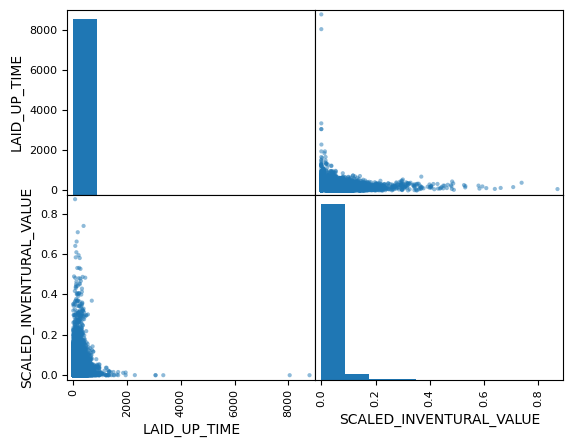

In [8]:
attributes = ["LAID_UP_TIME", "SCALED_INVENTURAL_VALUE"]
scatter_matrix(training_data_df[attributes])
plt.show()

In [9]:
training_data_df["SCALED_INVENTURAL_VALUE"].describe()

count    99004.000000
mean         0.013350
std          0.031157
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.871569
Name: SCALED_INVENTURAL_VALUE, dtype: float64

In [10]:
print(len(training_data_df["MODEL_CODE"].unique()))
print(training_data_df["COLOR_CODE"].isnull().sum())

5000
31425


## Prepare Data

### Keep columns of interest

NA: 36943
Unique: 43
Top Cats:
CUSTOMER_SALE_GROUP2_NAME
Endverbraucher private       24875
Endverbraucher Gewerblich    14130
Grossabnehmer                 6518
Gebrauchtwagenhaendler        4060
Interne Kunden                3209
WV Ausland EU mit ID          2026
Endverbr.Company GmbH etc     1020
Kunde des Agenten              874
GroÃŸkunden VW Konzern         740
EV AUSLAND EU                  568
Name: count, dtype: int64


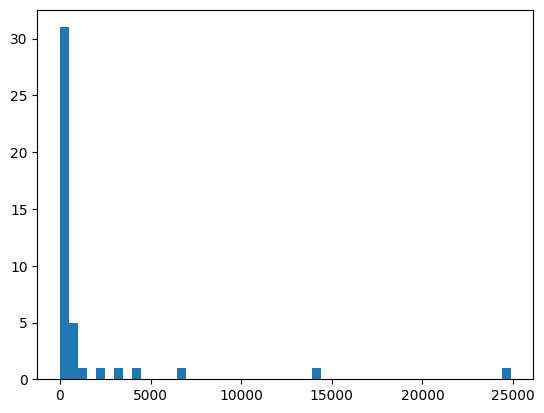

In [11]:
def can_be_mapped(src: str, dest: str) -> bool:
    uni_map = list(training_data_df.groupby(src)[dest].nunique())
    return max(uni_map) == 1

def can_be_mapped_bidir(a: str, b: str) -> bool:
    return can_be_mapped(a, b) and can_be_mapped(b, a)

def count_na(col: str, df: pd.DataFrame) -> int:
    return df[col].isna().sum()

# print(count_na("COLOR_CODE", training_data_df))
# print(can_be_mapped("CUSTOMER_SALE_GROUP_NAME", "CUSTOMER_SALE_GROUP2_NAME"))
# print(training_data_df["COLOR_CODE"].nunique())

def print_stats(col: str) -> None:
    print(f'NA: {count_na(col, training_data_df)}')
    print(f'Unique: {training_data_df[col].nunique()}')
    print(f'Top Cats:\n{training_data_df[col].value_counts().head(10)}')
    plt.hist(training_data_df[col].value_counts(), bins=50)

print_stats("CUSTOMER_SALE_GROUP2_NAME")

In [72]:
columns_of_interest = [
    "RPAKREP_VEHICLE_HKEY",
    "COMPANY",
    "OFFICE",
    # "OFFICE_MAIN_BRAND", # could be used for an additional feature (comparison to MANUFACTURER_SHORT)
    # "CHASSIS_NUMBER", # irrelevant as it is a unique identifier for the vehicle
    "MANUFACTURER_SHORT",
    # "MANUFACTURER", # contains more null values then MANUFACTURER_SHORT
    "VEHICLE_GROUP",
    # "VEHICLE_TYPE", # contains too many unique entries (>13,700)
    # "MODEL_CODE", # contains many null values and too many unique ones
    # "VARIANT", # mostly null values
    "MILEAGE",
    # "OPERATING_HOURS", # contains just 6 unique values, mostly 0s
    # "MILAGE_IN_FIELD", # contains just 1s and nulls, mostly 1s
    "MILAGE_SALES", # the difference between MILEAGE and MILAGE_SALES might be more relevant
    # "OPERATING_HOURS_SALES", # contains just 5 unique values, mostly 0s
    # "RIM_KEY", # contains mostly nulls
    # "COLOR_CODE", # contains only 30% not nulls
    # "COLOR_CODE_NAME", # contains mostly 'Nicht definiert'
    "COLOR",
    # "COLOR_TYPE", # contains mostly 'N'
    # "UPHOLSTERY_CODE", # contains only 30% not nulls
    "UPHOLSTERY",
    # "UPHOLSTERY_CODE_ALT", # contains mostly 'N'
    # "CERTIFICATE_TYPE", # mostly nulls
    # "CERTIFICATE_TYPE_DATE", # mostly 0s
    # "FACTORY_NUMBER", # mostly nulls
    # "ENGINE_ID", # many nulls, more like an id
    "ENGINE_TYPE",
    # "ENGINE_ID_ALT", # 60% nulls
    # "TRANSMISSION", # 80% nulls
    "TRANSMISSION_TYPE",
    # "TRANSMISSION_ID", # 80% nulls
    # "TRANSMISSION_SHORT", # mostly mappable to TRANSMISSION_NAME
    "TRANSMISSION_NAME",
    # "RIMS", # mostly nulls
    # "FRONT_TIRES", # mostly nulls
    # "FRONT_TIRES_CONDITION", # mostly 0.00
    # "REAR_TIRES", # mostly nulls
    # "REAR_TIRES_CONDITION", # mostly 0.00
    "NUMBER_DOORS",
    "NUMBER_SEATS",
    # "PERMITTED_TOTAL_WEIGHT", # 85% 0s
    # "MAX_TRAILOR_LOAD", # 95% 0s
    "CURB_WEIGHT",
    "YEAR_CONSTRUCTION",
    # "CONSTRUCTION_MONTH", # might not be relevant
    # "NUMBER_AXLE", # mostly 0s
    "NUMBER_ENGINE_CYLINDER",
    # "REPAIR_RKZ", # only 0s and nulls
    # "OPTICAL_CONDITION", # only 0s and nulls
    # "TECHNICAL_CONDITION", # only 0s and nulls
    "ACCIDENT_VEHICLE",
    # "COMMISSION_NUMBER", # too many uniques
    "HORSEPOWER",
    # "KW", # horsepower egould be enough
    "CCM",
    "NUMBER_OWNERS",
    # "IS_USED_CAR", # can be mapped from NUMBER_OWNERS
    # "LEASING_CONTRACT_DATE", # mostly nulls
    # "LEASING_START", # mostly nulls
    # "LEASING_END", # mostly nulls
    # "LEASING_MILAGE", # mostly 0s
    # "PAINT_TYPE", # only nulls
    # "FINANCING_TYPE", # FINANCING_TYPE_NAME is already enough
    "FINANCING_TYPE_NAME",
    # "KAT_VEHICLE", # one class is overrepresented
    # "FUEL_TYPE", # FUEL_TYPE_NAME is already enough
    "FUEL_TYPE_NAME",
    # "DRIVE_TYPE", # DRIVE_TYPE_NAME is already enough
    "DRIVE_TYPE_NAME",
    # "VEHICLE_MODEL_ID", # VEHICLE_MODEL_ID_NAME is already enough
    "VEHICLE_MODEL_ID_NAME",
    # "COMMISSION_TYPE", # COMMISSION_TYPE_NAME is already enough
    "COMMISSION_TYPE_NAME",
    # "DEMONSTRATION_STATUS", # mostly nulls
    "PURCHASE_DATE",
    # "PURCHASE_BOOKING_DATE", # not relevant due to PURCHASE_DATE
    # "PURCHASE_MILAGE", # the difference between PURCHASE_MILAGE and MILAGE_SALES might be more relevant
    # "PURCHASE_OPERATION_HOURS", # only 0s and nulls
    # "PRICE_LIST", # mostly nulls
    # "DAY_OF_REGISTRATION", # mostly nulls and 'N'
    # "AT_LOCATION_SINCE", # mostly 0s
    "LAID_UP_TIME",
    # "SOLD_CUSTOMER_ID", # too many different classes
    # "SOLD_INVOICE_COSTUMER_ID", # too many different classes
    # "MILAGE_SALE", # mostly identical to MILAGE_SALES
    # "OPERATION_HOURS_SALE", mostly 0s
    # "SOLD_INVOICE_COSTUMER_ID2", # too many different classes
    "CUSTOMER_TYPE",
    # "CUSTOMER_GROUP", # CUSTOMER_SALE_GROUP2_NAME is already enough
    # "CUSTOMER_GROUP_NAME", # CUSTOMER_SALE_GROUP2_NAME is already enough
    # "CUSTOMER_FEATURE", # CUSTOMER_SALE_GROUP2_NAME is already enough
    # "CUSTOMER_FEATURE_NAME", # CUSTOMER_SALE_GROUP2_NAME is already enough
    # "SALE_CUSTOMER_ID2", # too many different classes
    # "CUSTOMER_SALE_GROUP", # CUSTOMER_SALE_GROUP2_NAME is already enough
    # "CUSTOMER_SALE_GROUP_NAME", # CUSTOMER_SALE_GROUP2_NAME is already enough
    # "CUSTOMER_SALE_GROUP2", # CUSTOMER_SALE_GROUP2_NAME is already enough
    "CUSTOMER_SALE_GROUP2_NAME",
    "SCALED_CURRENT_VALUE",
    "SCALED_INVENTURAL_VALUE",
    "SCALED_REPORT_VALUE",
    "SCALED_VALUATION_PRICE",
    "SCALED_GUIDE_PRICE",
    "SCALED_TOTAL_SALES_PRICE_BASIS",
    "SCALED_TOTAL_SALE_PRICE",
    "SCALED_TOTAL_SALES_PRICE_DIFF"
]

training_data_prepared_df = training_data_df[columns_of_interest].copy()
training_data_prepared_df.head()

,RPAKREP_VEHICLE_HKEY,COMPANY,OFFICE,MANUFACTURER_SHORT,VEHICLE_GROUP,MILEAGE,MILAGE_SALES,COLOR,UPHOLSTERY,ENGINE_TYPE,...,CUSTOMER_TYPE,CUSTOMER_SALE_GROUP2_NAME,SCALED_CURRENT_VALUE,SCALED_INVENTURAL_VALUE,SCALED_REPORT_VALUE,SCALED_VALUATION_PRICE,SCALED_GUIDE_PRICE,SCALED_TOTAL_SALES_PRICE_BASIS,SCALED_TOTAL_SALE_PRICE,SCALED_TOTAL_SALES_PRICE_DIFF
0,77c1af48604226d47b2ccf7be44df009,44.0,TA,FOR,ECS,8600.0,8600.0,Magnetic-Grau Metallic,Teilleder,NaN,...,K,Endverbraucher private,0.052907,0.000000,0.950043,0.0,0.002975,0.011018,0.011321,-0.000303
1,39587e4f9324333232d2ffaa2f314e6d,12.0,44,VOL,XC4,0.0,0.0,Onyx Schwarz-Metallic,Grau,4 Zylinder Reihe-Mot,...,K,NaN,0.061605,0.000000,0.950043,0.0,0.006136,0.026411,0.019844,0.006567
2,a91470879cf756368c1d0099a2fa939a,27.0,33,FOR,TOC,1297.0,0.0,Ink Black Metallic,siehe Ausstattung,2.0 TDE 66KW/90 E4,...,K,Endverbraucher private,0.063286,0.000000,0.950043,0.0,0.001378,0.022102,0.022053,0.000049
3,61363a68ff967e7f0c4b80b46a55b141,33.0,K1,V,POL,6020.0,6020.0,Reflexsilber Metallic,Titanschwarz/Titanschwarz,DSGD,...,U,Interne Kunden,0.042565,0.029537,0.897257,0.0,0.001378,0.000000,0.000572,-0.000572
4,fd5b09f7d857904d03a36d1a479f2ca4,10.0,96,FOR,FOC,0.0,0.0,Agate Black Metallic -(PN,Stoffpolsterung in Anthra,BITTE MOT-ID PFLEGEN,...,NaN,NaN,0.054914,0.000000,0.950043,0.0,0.004863,0.019715,0.013360,0.006355


### Convert dtypes

In [73]:
def map_values_to_na(col: str, values: list[any]):
    training_data_prepared_df[col] = training_data_prepared_df[col].map(lambda x: np.nan if x in values else x)

# RPAKREP_VEHICLE_HKEY
# COMPANY
training_data_prepared_df["COMPANY"] = training_data_prepared_df["COMPANY"].astype("Int64").astype("object")
# OFFICE
training_data_prepared_df["OFFICE"] = training_data_prepared_df["OFFICE"].astype("object")
# MANUFACTURER_SHORT
training_data_prepared_df["MANUFACTURER_SHORT"] = training_data_prepared_df["MANUFACTURER_SHORT"].astype("object")
map_values_to_na("MANUFACTURER_SHORT", ["*"])
# VEHICLE_GROUP
training_data_prepared_df["VEHICLE_GROUP"] = training_data_prepared_df["VEHICLE_GROUP"].astype("object")
map_values_to_na("VEHICLE_GROUP", ["*"])
# MILEAGE
# COLOR
training_data_prepared_df["COLOR"] = training_data_prepared_df["COLOR"].astype("object")
map_values_to_na("COLOR", ["-"])
# UPHOLSTERY
training_data_prepared_df["UPHOLSTERY"] = training_data_prepared_df["UPHOLSTERY"].astype("object")
map_values_to_na("UPHOLSTERY", ["0", "1", "-, -", "#NAME?"])
# ENGINE_TYPE
training_data_prepared_df["ENGINE_TYPE"] = training_data_prepared_df["ENGINE_TYPE"].astype("object")
map_values_to_na("ENGINE_TYPE", ["BITTE MOT-ID PFLEGEN", "-", "*", ".", "#NAME?"])
# TRANSMISSION_TYPE
training_data_prepared_df["TRANSMISSION_TYPE"] = training_data_prepared_df["TRANSMISSION_TYPE"].astype("object")
# TRANSMISSION_NAME
training_data_prepared_df["TRANSMISSION_NAME"] = training_data_prepared_df["TRANSMISSION_NAME"].astype("object")
map_values_to_na("TRANSMISSION_NAME", ["Nicht definiert"])
# NUMBER_DOORS
map_values_to_na("NUMBER_DOORS", [0.0])
# NUMBER_SEATS
map_values_to_na("NUMBER_SEATS", [-1.0, 0.0])
# CURB_WEIGHT
map_values_to_na("CURB_WEIGHT", [0.0])
# YEAR_CONSTRUCTION
training_data_prepared_df["YEAR_CONSTRUCTION"] = training_data_prepared_df["YEAR_CONSTRUCTION"].map(lambda x: np.nan if x < 1900 or x > 2024 else x)
# NUMBER_ENGINE_CYLINDER
training_data_prepared_df["NUMBER_ENGINE_CYLINDER"] = training_data_prepared_df.apply(lambda x: np.nan if x["NUMBER_ENGINE_CYLINDER"] < 1 and x["FUEL_TYPE_NAME"] == "Elektro" else x, axis=1)["NUMBER_ENGINE_CYLINDER"]
# ACCIDENT_VEHICLE
training_data_prepared_df["ACCIDENT_VEHICLE"] = training_data_prepared_df["ACCIDENT_VEHICLE"].map({"N": False, 1: True}, na_action="ignore")
training_data_prepared_df["ACCIDENT_VEHICLE"] = training_data_prepared_df["ACCIDENT_VEHICLE"].astype("boolean")
# HORSEPOWER
map_values_to_na("HORSEPOWER", [0.0])
# CCM
map_values_to_na("CCM", [0.0])
# NUMBER_OWNERS
# FINANCING_TYPE_NAME
training_data_prepared_df["FINANCING_TYPE_NAME"] = training_data_prepared_df["FINANCING_TYPE_NAME"].astype("object")
map_values_to_na("FINANCING_TYPE_NAME", ["Nicht definiert"])
# FUEL_TYPE_NAME
training_data_prepared_df["FUEL_TYPE_NAME"] = training_data_prepared_df["FUEL_TYPE_NAME"].astype("object")
# DRIVE_TYPE_NAME
training_data_prepared_df["DRIVE_TYPE_NAME"] = training_data_prepared_df["DRIVE_TYPE_NAME"].astype("object")
map_values_to_na("DRIVE_TYPE_NAME", ["Nicht definiert"])
# VEHICLE_MODEL_ID_NAME
training_data_prepared_df["VEHICLE_MODEL_ID_NAME"] = training_data_prepared_df["VEHICLE_MODEL_ID_NAME"].astype("object")
map_values_to_na("VEHICLE_MODEL_ID_NAME", ["Keine Zuteilung"])
# COMMISSION_TYPE_NAME
training_data_prepared_df["COMMISSION_TYPE_NAME"] = training_data_prepared_df["COMMISSION_TYPE_NAME"].astype("object")
# PURCHASE_DATE
# LAID_UP_TIME
# CUSTOMER_TYPE
training_data_prepared_df["CUSTOMER_TYPE"] = training_data_prepared_df["CUSTOMER_TYPE"].astype("object")
# CUSTOMER_SALE_GROUP2_NAME
training_data_prepared_df["CUSTOMER_SALE_GROUP2_NAME"] = training_data_prepared_df["CUSTOMER_SALE_GROUP2_NAME"].astype("object")
# SCALED_CURRENT_VALUE
# SCALED_INVENTURAL_VALUE
# SCALED_REPORT_VALUE
# SCALED_VALUATION_PRICE
# SCALED_GUIDE_PRICE
# SCALED_TOTAL_SALES_PRICE_BASIS
# SCALED_TOTAL_SALE_PRICE
# SCALED_TOTAL_SALES_PRICE_DIFF

### Remove certain rows and fill certain cells

In [74]:
# ToDo
# Leasing Cars?
# 67 -> often seen as null count

# Remove all rows where LAID_UP_TIME is na
print(len(training_data_prepared_df))
training_data_prepared_df.dropna(subset=["LAID_UP_TIME"], inplace=True)
print(len(training_data_prepared_df))

99071
99004


In [75]:
training_data_prepared_df.isna().sum()

RPAKREP_VEHICLE_HKEY                  0
COMPANY                               0
OFFICE                               34
MANUFACTURER_SHORT                   81
VEHICLE_GROUP                      1820
MILEAGE                               0
MILAGE_SALES                          0
COLOR                              3829
UPHOLSTERY                         3457
ENGINE_TYPE                       22464
TRANSMISSION_TYPE                 12472
TRANSMISSION_NAME                 26639
NUMBER_DOORS                      26213
NUMBER_SEATS                      28690
CURB_WEIGHT                       34939
YEAR_CONSTRUCTION                 25031
NUMBER_ENGINE_CYLINDER             4815
ACCIDENT_VEHICLE                    814
HORSEPOWER                        12408
CCM                               17258
NUMBER_OWNERS                         0
FINANCING_TYPE_NAME                2887
FUEL_TYPE_NAME                        0
DRIVE_TYPE_NAME                   34490
VEHICLE_MODEL_ID_NAME             27934


<Axes: >

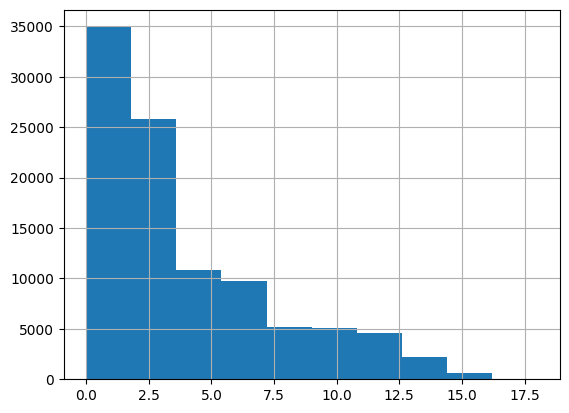

In [76]:
training_data_prepared_df.isna().sum(axis=1).hist()

In [77]:
print(len(training_data_prepared_df))
training_data_prepared_df.dropna(thresh=24, inplace=True)
print(len(training_data_prepared_df))
print(training_data_prepared_df.isna().sum())

99004
98337
RPAKREP_VEHICLE_HKEY                  0
COMPANY                               0
OFFICE                               34
MANUFACTURER_SHORT                   55
VEHICLE_GROUP                      1643
MILEAGE                               0
MILAGE_SALES                          0
COLOR                              3176
UPHOLSTERY                         2802
ENGINE_TYPE                       21797
TRANSMISSION_TYPE                 11805
TRANSMISSION_NAME                 25999
NUMBER_DOORS                      25546
NUMBER_SEATS                      28023
CURB_WEIGHT                       34272
YEAR_CONSTRUCTION                 24441
NUMBER_ENGINE_CYLINDER             4815
ACCIDENT_VEHICLE                    346
HORSEPOWER                        11751
CCM                               16591
NUMBER_OWNERS                         0
FINANCING_TYPE_NAME                2818
FUEL_TYPE_NAME                        0
DRIVE_TYPE_NAME                   33823
VEHICLE_MODEL_ID_NAME       

In [81]:
training_data_fully_cleared_df = training_data_prepared_df.dropna().copy()

# OFFICE: drop rows
training_data_prepared_df.dropna(subset=["OFFICE"], inplace=True)
# MANUFACTURER_SHORT: drop rows
training_data_prepared_df.dropna(subset=["MANUFACTURER_SHORT"], inplace=True)
# VEHICLE_GROUP: fille with new catetory
training_data_prepared_df["VEHICLE_GROUP"] = training_data_prepared_df["VEHICLE_GROUP"].fillna("Unknown")
# COLOR: fille with new catetory
training_data_prepared_df["COLOR"] = training_data_prepared_df["COLOR"].fillna("Unknown")
# UPHOLSTERY: fille with new catetory
training_data_prepared_df["UPHOLSTERY"] = training_data_prepared_df["UPHOLSTERY"].fillna("Unknown")
# ENGINE_TYPE:
# TRANSMISSION_TYPE:
# TRANSMISSION_NAME:
# NUMBER_DOORS:
# NUMBER_SEATS:
# CURB_WEIGHT:
# YEAR_CONSTRUCTION:
# NUMBER_ENGINE_CYLINDER:
# ACCIDENT_VEHICLE: fill with False
training_data_prepared_df["ACCIDENT_VEHICLE"] = training_data_prepared_df["ACCIDENT_VEHICLE"].fillna(False)
# HORSEPOWER:
# CCM:
# FINANCING_TYPE_NAME: fille with new catetory
training_data_prepared_df["FINANCING_TYPE_NAME"] = training_data_prepared_df["FINANCING_TYPE_NAME"].fillna("Unknown")
# DRIVE_TYPE_NAME:
# VEHICLE_MODEL_ID_NAME:
# PURCHASE_DATE:
# CUSTOMER_TYPE:
# CUSTOMER_SALE_GROUP2_NAME:

training_data_fully_cleared_df.isna().sum()

RPAKREP_VEHICLE_HKEY              0
COMPANY                           0
OFFICE                            0
MANUFACTURER_SHORT                0
VEHICLE_GROUP                     0
MILEAGE                           0
MILAGE_SALES                      0
COLOR                             0
UPHOLSTERY                        0
ENGINE_TYPE                       0
TRANSMISSION_TYPE                 0
TRANSMISSION_NAME                 0
NUMBER_DOORS                      0
NUMBER_SEATS                      0
CURB_WEIGHT                       0
YEAR_CONSTRUCTION                 0
NUMBER_ENGINE_CYLINDER            0
ACCIDENT_VEHICLE                  0
HORSEPOWER                        0
CCM                               0
NUMBER_OWNERS                     0
FINANCING_TYPE_NAME               0
FUEL_TYPE_NAME                    0
DRIVE_TYPE_NAME                   0
VEHICLE_MODEL_ID_NAME             0
COMMISSION_TYPE_NAME              0
PURCHASE_DATE                     0
LAID_UP_TIME                

### Add derived features to the dataframe

In [82]:
# OFFICE_MAIN_BRAND = MANUFACTURER_SHORT
# MILEAGE - MILAGE_SALES (PURCHASE_MILAGE) (MILAGE_SALE)
milage_diff = training_data_fully_cleared_df["MILAGE_SALES"] - training_data_fully_cleared_df["MILEAGE"]
training_data_fully_cleared_df["MILEAGE_DIFF"] = milage_diff

In [83]:
corr_matrix = training_data_fully_cleared_df.select_dtypes(include=["number"]).corr()
corr_matrix["LAID_UP_TIME"].sort_values(ascending=False)

LAID_UP_TIME                      1.000000
SCALED_INVENTURAL_VALUE           0.452836
YEAR_CONSTRUCTION                 0.148478
SCALED_CURRENT_VALUE              0.124340
NUMBER_DOORS                      0.110202
SCALED_TOTAL_SALE_PRICE           0.071488
SCALED_TOTAL_SALES_PRICE_BASIS    0.060236
NUMBER_SEATS                      0.050193
SCALED_GUIDE_PRICE                0.046783
HORSEPOWER                        0.042500
CURB_WEIGHT                       0.012043
MILEAGE_DIFF                      0.003329
SCALED_REPORT_VALUE              -0.004879
CCM                              -0.011801
SCALED_TOTAL_SALES_PRICE_DIFF    -0.024833
MILEAGE                          -0.039913
MILAGE_SALES                     -0.065322
NUMBER_ENGINE_CYLINDER           -0.065851
NUMBER_OWNERS                    -0.070589
SCALED_VALUATION_PRICE                 NaN
Name: LAID_UP_TIME, dtype: float64

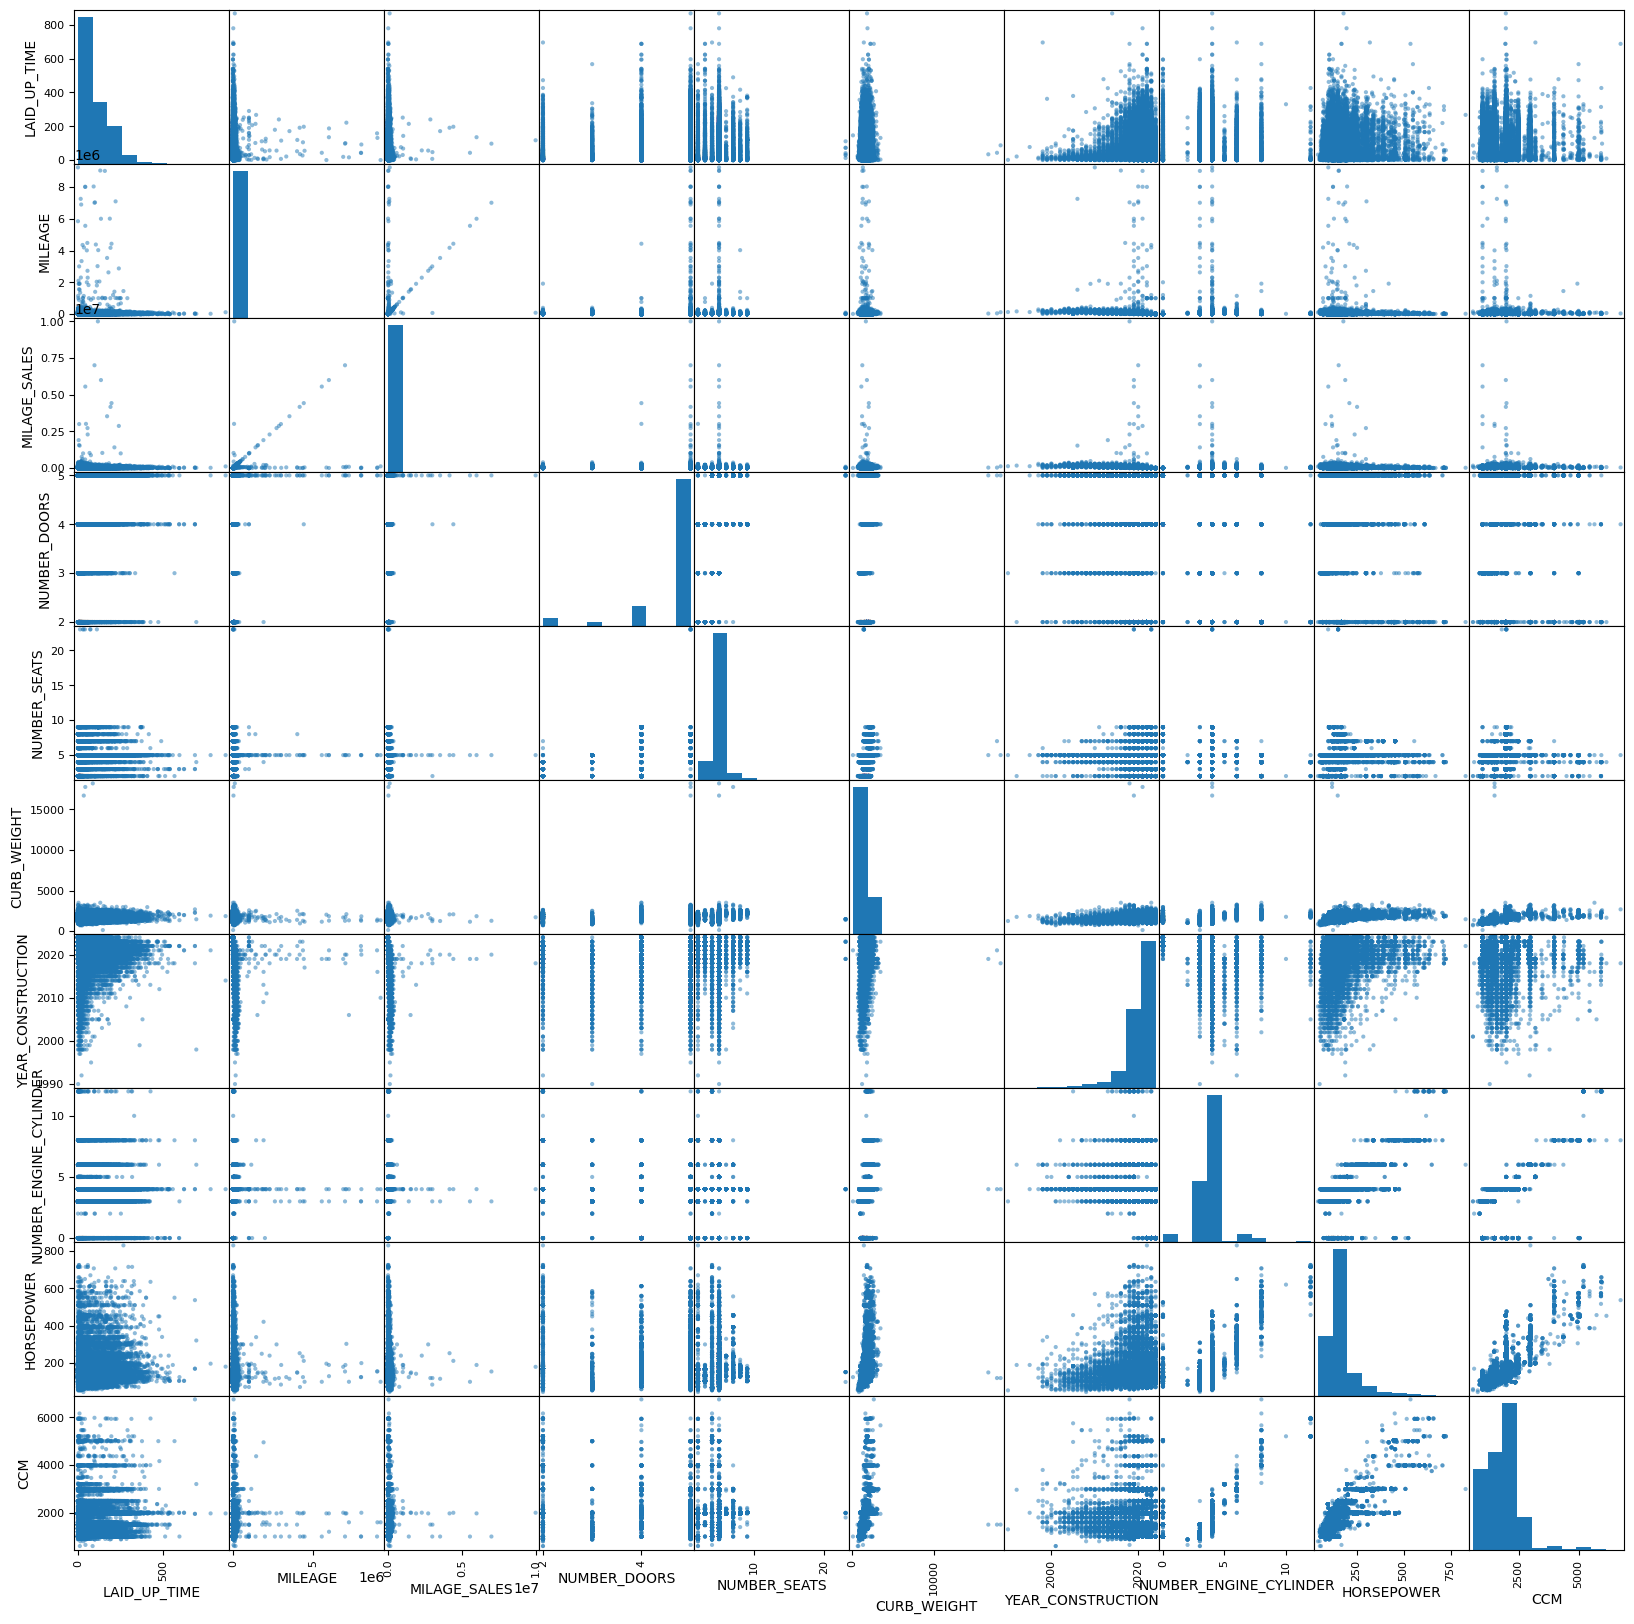

In [ ]:
attributes = [
    "LAID_UP_TIME",
    "MILEAGE",
    "MILAGE_SALES",
    "NUMBER_DOORS",
    "NUMBER_SEATS",
    "CURB_WEIGHT",
    "YEAR_CONSTRUCTION",
    "NUMBER_ENGINE_CYLINDER",
    "HORSEPOWER",
    "CCM"
]
scatter_matrix(training_data_fully_cleared_df[attributes], figsize=[20, 20])
plt.show()

# ToDo: Try boxplots for different categorical values